In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sys import path
path.insert(0, "lib")
from SGD_utils import *

In [50]:
class SGD_batch:
    """
    Exact SGD dynamics 
    """
    def __init__(self, lr, q, grad_q, w_init, nsamp, batch_size, seed):
        """
        lr: learning rate
        q: model
        grad_q: gradient of the model
        """
        self.lr = lr
        self.q = q
        self.grad_q = grad_q
        self.nb = batch_size
        self.w = [w_init]
        self.state = np.random.RandomState(seed=seed)
        # uncorrelated X and Y data
        self.x, self.y = self.state.normal(size=(2, nsamp))
        
    def update(self, w_old, d1, d2,a=-1,b=1):
        xb = self.state.choice(self.x, self.nb, replace=False)
        yb = self.state.choice(self.y, self.nb, replace=False)
        
        xi_xx = np.mean(xb*xb)
        xi_xy = np.mean(xb*yb)
        return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)
    
    def evolve(self, nstep, d1, d2,a=-1,b=1):
        wc = self.w[-1]
        for _ in range(nstep):
            wc = self.update(wc, d1, d2,a,b)
            self.w.append(wc)

def q(w, d1 ,d2, a=-1, b=1):
    return (w - a)**d1 * (w - b)**d2
    
def grad_q(w, d1, d2, a=-1, b=1):
    return (w-a)**(d1-1) * (w - b)**(d2-1) * (d1 * (w - b) + d2*(w - a))



In [51]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

The local maximum is at -0.6666666666666666 abd the height of the barrier is 89.89849108367629
trajectory 0 over 200


/tmp/ipykernel_5881/4126677748.py:35: RuntimeWarning: overflow encountered in scalar multiply
  return (w - a)**d1 * (w - b)**d2
/tmp/ipykernel_5881/4126677748.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)
/tmp/ipykernel_5881/4126677748.py:26: RuntimeWarning: overflow encountered in scalar multiply
  return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)


trajectory 50 over 200


/tmp/ipykernel_5881/4126677748.py:35: RuntimeWarning: overflow encountered in scalar power
  return (w - a)**d1 * (w - b)**d2
/tmp/ipykernel_5881/4126677748.py:38: RuntimeWarning: overflow encountered in scalar multiply
  return (w-a)**(d1-1) * (w - b)**(d2-1) * (d1 * (w - b) + d2*(w - a))


trajectory 100 over 200
trajectory 150 over 200


Text(0, 0.5, 'Potential')

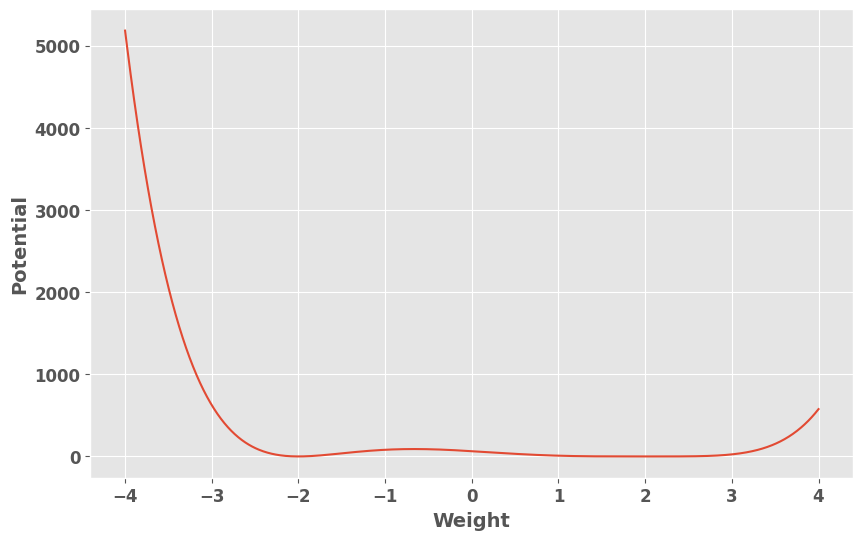

In [52]:
# Run many trajectories of SGD

d1 = 1
d2 = 2
lr = 0.01
batch_size = 30
nsamp = 10**3
num_trajectories = 200
niterations = 2*10**3

# Change a and b to play with the potential barrier
b = 2 # Singular 1.2 or 2
a = -b # regular
wmax = (a*d2 + b*d1)/(d1 + d2)
wm = 2*a
barrier = q(wmax, d1 ,d2, a,b)**2
trajectories = []

print(f"The local maximum is at {wmax} abd the height of the barrier is {barrier}")

for i in range(num_trajectories):
    if i % 50 == 0:
        print(f"trajectory {i} over {num_trajectories}")
    seed = i
    w_init = np.random.uniform(wm, -wm)
    # maybe seed here?
    L = SGD_batch(lr, q, grad_q, w_init, nsamp, batch_size, seed)
    L.evolve(niterations, d1, d2,a,b)
    trajectories.append(np.array(L.w).T)

trajectories = np.asarray(trajectories)

# Plot potential

wrange = np.linspace(-wm, wm, 1000)
potential = q(wrange, d1 ,d2, a,b)**2
plt.plot(wrange, potential)
plt.xlabel("Weight")
plt.ylabel("Potential")

/home/guime/anaconda3/envs/search/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


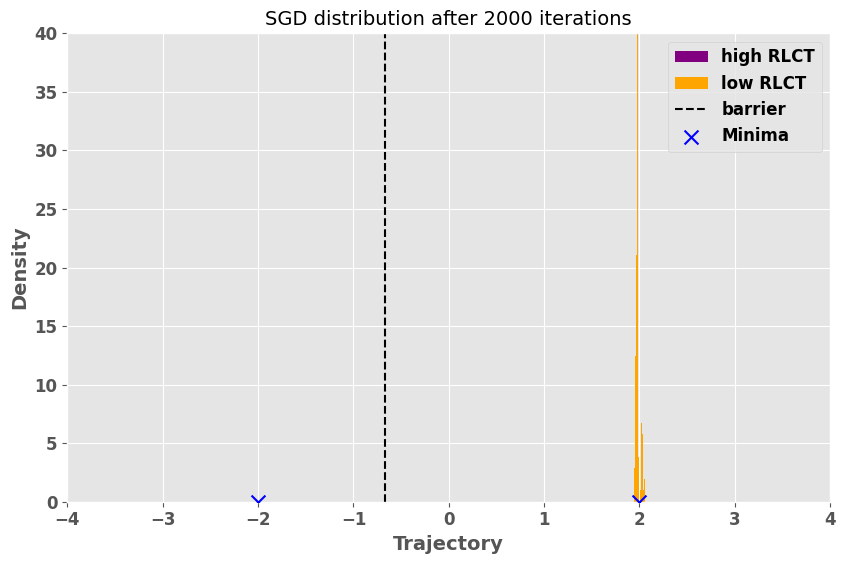

In [53]:
# Plot stationary histogram:
%matplotlib inline
w_end = [trajectories[i][-1] for i in range(num_trajectories)]
regular_hist = [value for value in w_end if value < wmax]
singular_hist = [value for value in w_end if value >= wmax]
bins = "auto"
plt.hist(regular_hist, bins=bins, density=True, color="purple", label="high RLCT")
plt.hist(singular_hist, bins=bins, density=True, color="orange", label="low RLCT")
plt.axvline(wmax, color='k', linestyle='--', label="barrier")
plt.scatter([a, b], [0, 0], color='blue', s=100, zorder=5, marker='x',label='Minima')
plt.xlabel("Trajectory")
plt.ylabel("Density")
plt.title(f"SGD distribution after {niterations} iterations")
plt.legend()
plt.ylim((0,40))
plt.xlim((2*a, -2*a))
plt.show()

/tmp/ipykernel_5881/1075759673.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


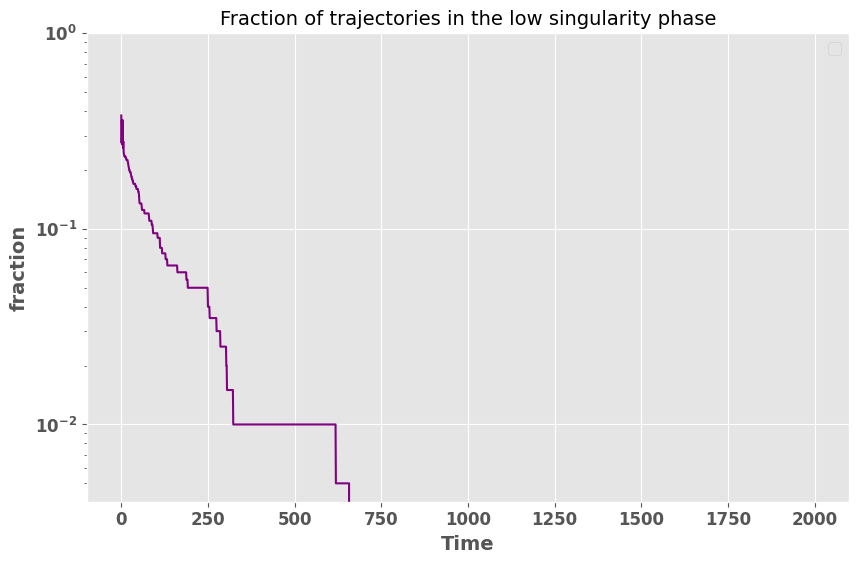

In [54]:
# Plot phase change
trajectories = np.asarray(trajectories)
end_traj = trajectories[:,-1]
phases = np.zeros_like(trajectories)
phases[trajectories - wmax > 0] = 1
phases[trajectories - wmax < 0] = -1

fraction_regular_phase = np.sum(phases == -1,axis=0)/phases.shape[0]
fraction_singular_phase = np.sum(phases == 1,axis=0)/phases.shape[0]

time = np.arange(0,niterations +1,1)

plt.plot(time, fraction_regular_phase[time], color="purple")
#plt.plot(time, fraction_singular_phase[time], label = "low RLCT", color="orange")
plt.xlabel("Time")
plt.ylabel("fraction")
plt.yscale("log")
plt.title("Fraction of trajectories in the low singularity phase")
plt.ylim((0,1))
plt.legend()

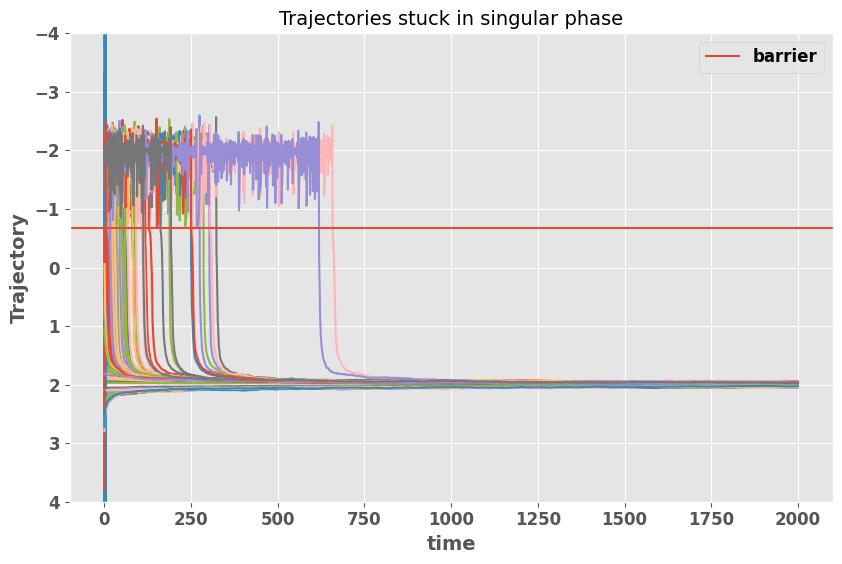

In [55]:
# Find a trajectory that change phase
init_phases = phases[:,0]
# Return the trajectories whose phases change

def phase_change(arr):
    """
    Find all rows where at least one element in that row is different from the corresponding element in the first column.
    
    Parameters:
    - arr (numpy.ndarray): Input 2D array.
    
    Returns:
    - list: Indices of rows that are different from the first column.
    """
    # Comparing each row with the first column
    different_rows = np.any(arr != arr[:, 0].reshape(-1, 1), axis=1)
    
    # Extracting the indices of the rows that are different
    return np.where(different_rows)[0].tolist()

traj_index = phase_change(phases)

traj_change = trajectories[traj_index, :]
for i in range(num_trajectories):
    plt.plot(time, trajectories[i,:])

plt.ylim((-wm, wm))
plt.axhline(y=wmax, label="barrier")
plt.xlabel("time")
plt.ylabel("Trajectory")
plt.title("Trajectories stuck in singular phase")
plt.legend()

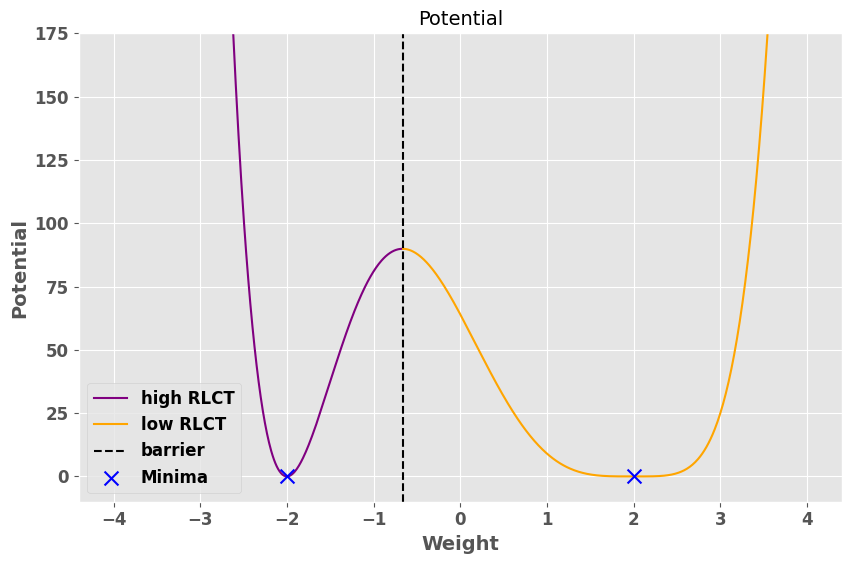

In [56]:
# Plot potential
%matplotlib inline
wm = 2*a
barrier = q(wmax, d1 ,d2, a,b)**2
wrange = np.linspace(-wm, wm, 1000)
potential = q(wrange, d1 ,d2, a,b)**2
# Split the data at x = b
regular = wrange < wmax
singular = wrange >= wmax

plt.plot(wrange[regular], potential[regular], color="purple", label="high RLCT")
plt.plot(wrange[singular], potential[singular], color="orange", label="low RLCT")

plt.xlabel("Weight")
plt.ylabel("Potential")
plt.axvline(x=wmax, linestyle='--' ,color="k", label="barrier")
plt.scatter([a, b], [q(a, d1 ,d2, a,b)**2, q(b, d1 ,d2, a,b)**2], color='blue', s=100, zorder=5, marker='x',label='Minima')
plt.ylim((-10, 175))
plt.legend()
plt.title("Potential")
plt.show()